<img src="https://huggingface.co/front/assets/homepage/hugs-mobile.svg" width=500>

# **Introduction to 🤗 Face**

### **What is Hugging Face?**

Hugging Face is a machine learning and data science platform and community. It provides tools for users to build, train, and deploy ML models based on open source code and technologies. It is a hub of open source models for Natural Language Processing, computer vision, and other fields where AI plays its role.
https://huggingface.co/

### **The Problem:**

Transformer models are usually very large. With millions to tens of billions of parameters, training and deploying these models is a complicated undertaking. Furthermore, with new models being released on a near-daily basis and each having its own implementation, trying them all out is no easy task.

### **The Solution:**

The 🤗 Transformers library was created to solve this problem. Its goal is to provide a single API through which any Transformer model can be loaded, trained, and saved.

In [ ]:
# Install dependencies
!pip install torch transformers datasets bitsandbytes trl peft
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q einops

# **Pipelines**

The pipeline is the easiest and fastest way to use a pretrained model for inference. It offers a ready-to-use solution for a wide array of language-related tasks and diverse applications across various modalities.

These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering.


| **Task**                     | **Description**                                                                                              | **Modality**    | **Pipeline identifier**                       |
|------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------|-----------------------------------------------|
| Text classification          | assign a label to a given sequence of text                                                                   | NLP             | pipeline(task=“sentiment-analysis”)           |
| Text generation              | generate text given a prompt                                                                                 | NLP             | pipeline(task=“text-generation”)              |
| Summarization                | generate a summary of a sequence of text or document                                                         | NLP             | pipeline(task=“summarization”)                |
| Image classification         | assign a label to an image                                                                                   | Computer vision | pipeline(task=“image-classification”)         |
| Image segmentation           | assign a label to each individual pixel of an image (supports semantic, panoptic, and instance segmentation) | Computer vision | pipeline(task=“image-segmentation”)           |
| Object detection             | predict the bounding boxes and classes of objects in an image                                                | Computer vision | pipeline(task=“object-detection”)             |
| Audio classification         | assign a label to some audio data                                                                            | Audio           | pipeline(task=“audio-classification”)         |
| Automatic speech recognition | transcribe speech into text                                                                                  | Audio           | pipeline(task=“automatic-speech-recognition”) |
| Visual question answering    | answer a question about the image, given an image and a question                                             | Multimodal      | pipeline(task=“vqa”)                          |
| Document question answering  | answer a question about a document, given an image and a question                                            | Multimodal      | pipeline(task="document-question-answering")  |
| Image captioning             | generate a caption for a given image                                                                         | Multimodal      | pipeline(task="image-to-text")                |


 For each task, you can also search the [model hub](https://huggingface.co/models) for various models you can use in the pipeline as well.

In [2]:
from transformers import pipeline

## **Sentiment Analysis Pipeline**:

In [3]:
# Use pipeline for sentiment analysis
classifier = pipeline(task = "sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [4]:
classifier("This is very cool!")

[{'label': 'POSITIVE', 'score': 0.999862790107727}]

In [5]:
classifier("I dont like this at all.")

[{'label': 'NEGATIVE', 'score': 0.9836413860321045}]

We can also pass multiple texts to the object returned by the pipeline to treat them together as batch.

In [6]:
sentences = [
    "I love the warm sunshine and clear blue skies.",
    "This job interview went better than I expected.",
    "The constant delays in public transportation are frustrating.",
    "The unexpected gift brought a smile to my face."
]

In [7]:
classifier(sentences)

[{'label': 'POSITIVE', 'score': 0.9998807907104492},
 {'label': 'POSITIVE', 'score': 0.9945685863494873},
 {'label': 'NEGATIVE', 'score': 0.9990144968032837},
 {'label': 'POSITIVE', 'score': 0.9998737573623657}]


We have the flexibility to utilize alternative models available in the Hub for specific tasks by accessing the [hub](https://huggingface.co/models). We also have the option to employ open-source fine-tuned models.

For example, for a  domain-specific application such as sentiment analysis on social media, I have used the model https://huggingface.co/Remicm/sentiment-analysis-model-for-socialmedia.

In [8]:
social_media_sentences = [
    "Just had an amazing brunch with friends! 😍🍳 #GoodVibesOnly",
    "Stuck in traffic again! 😩 #MondayBlues",
    "Excited for the weekend getaway! 🌴☀️ #TravelGoals",
    "Feeling grateful for all the love and support from my followers. Thank you! ❤️ #Gratitude",
]

In [9]:
social_media_model = "Remicm/sentiment-analysis-model-for-socialmedia"

In [10]:
# Use pipeline to use this fine-tuned model for sentiment analysis
social_media_classifier = pipeline(task = "sentiment-analysis", model=social_media_model)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [11]:
social_media_classifier(social_media_sentences)

[{'label': 'LABEL_1', 'score': 0.9670287370681763},
 {'label': 'LABEL_0', 'score': 0.8575953245162964},
 {'label': 'LABEL_1', 'score': 0.7020541429519653},
 {'label': 'LABEL_1', 'score': 0.9895205497741699}]

## **Zero Shot Classification Pipeline**

Zero Shot Classification pipeline is more like a text classification pipeline, that allows us to provide the labels we want to classify the text by.

In [12]:
text = "I have a problem with my iphone that needs to be resolved asap!!"
labels = ["urgent", "not urgent", "phone", "tablet", "computer"]

In [13]:
# Use pipeline for zero-shot classification
zero_classifier = pipeline(task = "zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [14]:
zero_classifier(
    text,
    candidate_labels = labels,
)

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5036357045173645,
  0.478799432516098,
  0.012600341811776161,
  0.0026557832024991512,
  0.0023087661247700453]}

## **Text Generation Pipeline**

When we give an input prompt, it will autocomplete it.

In [15]:
# Use pipeline for text-generation
text_gen = pipeline(task = "text-generation")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [16]:
text = "In today's session we will be learning about "

In [17]:
text_gen(text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "In today's session we will be learning about \xa0the life of Robert A. Linder, the architect, musician and designer of the popular and popular TV show 'Wolverine.' In this talk we will see how he built the series based"}]

Similar to what we did for the sentiment analysis pipeline, we will be trying to use different models here as well.

In [18]:
alt_model = "distilgpt2"

In [19]:
# Use pipeline for text-generation using another model
text_gen = pipeline(task = "text-generation", model = alt_model)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [20]:
text_gen("In today's session we will be learning about Hugging Face Transformer Library",
         max_length = 30,
         num_return_sequences = 4
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "In today's session we will be learning about Hugging Face Transformer Library. The library is open source and requires Python 3, which is available for"},
 {'generated_text': "In today's session we will be learning about Hugging Face Transformer Library (HT) for a good bit of information about the type and capabilities of"},
 {'generated_text': "In today's session we will be learning about Hugging Face Transformer Library as well as several other great tool to develop and support a project for use"},
 {'generated_text': "In today's session we will be learning about Hugging Face Transformer Library and also our future plans and plans to open up our website for publishing at"}]

## **Fill Mask Pipeline**

Fill Mask predicts missing words from an input sentence.

In [21]:
# Use pipeline to fill mask
fillmask = pipeline("fill-mask")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [23]:
text_fm = "Today's session will teach you all about <mask> models"

In [24]:
fillmask(text_fm, top_k=5)

[{'score': 0.10191857069730759,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': "Today's session will teach you all about mathematical models"},
 {'score': 0.056954603642225266,
  'token': 774,
  'token_str': ' role',
  'sequence': "Today's session will teach you all about role models"},
 {'score': 0.047856274992227554,
  'token': 265,
  'token_str': ' business',
  'sequence': "Today's session will teach you all about business models"},
 {'score': 0.0395536944270134,
  'token': 27930,
  'token_str': ' predictive',
  'sequence': "Today's session will teach you all about predictive models"},
 {'score': 0.03559189289808273,
  'token': 745,
  'token_str': ' building',
  'sequence': "Today's session will teach you all about building models"}]

## **NER (Named Entity Recognition) Pipeline**

Named Entity Recognition Pipeline is used for predicting the classes of tokens or entities in a sentance as person, organisation, location or miscellaneous.

In [25]:
# Use pipeline for NER
ner = pipeline(task = "ner", grouped_entities = True)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [26]:
ner_text = "Hello! I'm Amritha, and I am studying Artificial Intelligence at Amrita Vishwa Vidyapeetham, Coimbatore"

In [27]:
ner(ner_text)

[{'entity_group': 'PER',
  'score': 0.988122,
  'word': 'Amritha',
  'start': 11,
  'end': 18},
 {'entity_group': 'MISC',
  'score': 0.7263648,
  'word': '##ial Intelligence',
  'start': 45,
  'end': 61},
 {'entity_group': 'ORG',
  'score': 0.63288105,
  'word': 'Amrita Vishwa Vidyapeetham',
  'start': 65,
  'end': 91},
 {'entity_group': 'LOC',
  'score': 0.9737637,
  'word': 'Coimbatore',
  'start': 93,
  'end': 103}]

## **Summerization Pipeline**

In [28]:
# Use pipeline for summerization
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [29]:
text = """Language Model (LM) is a type of artificial intelligence model that focuses on understanding and generating human language.
          Large Language Models (LLMs) represent a significant advancement in natural language processing, as they are capable of learning
          intricate patterns and relationships within vast amounts of textual data. These models, often built with Transformer architectures,
          have shown exceptional performance in various language-related tasks. Hugging Face, a prominent player in the field of natural language processing,
          has played a pivotal role in democratizing access to pre-trained LLMs. The Hugging Face Transformers library serves as a comprehensive repository,
          offering a unified API for easy loading, training, and utilization of a wide array of Transformer-based models.
          Whether it's BERT, GPT, or other state-of-the-art architectures, Hugging Face provides a user-friendly interface for
          researchers and developers to seamlessly integrate these powerful models into their projects. The Hugging Face Model Hub
          further enhances accessibility, allowing users to explore and share pre-trained models. This collaborative platform has
          fostered a vibrant community, where practitioners can discover, fine-tune, and deploy models for specific tasks.
          The Hub's diverse collection spans domains like natural language understanding, translation, sentiment analysis, and more,
          making it a valuable resource for anyone working with language-based applications."""

In [30]:
summarizer(text, min_length = 10, max_length = 150)

[{'summary_text': ' Language Model (LM) is a type of artificial intelligence model that focuses on understanding and generating human language . Large Language Models (LLMs) represent a significant advancement in natural language processing . Hugging Face has played a pivotal role in democratizing access to pre-trained LLMs .'}]

## **Question-Answering Pipeline**

Question answering returns an answer to a question, sometimes with context and other times without context.

This task happens whenever we ask a virtual assistant something like whether a restaurant is open. It can also provide customer or technical support and help search engines retrieve the relevant information you're asking for.

In [31]:
# Use pipeline for question answering
question_answerer = pipeline(task="question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [32]:
q = "Who is the author of the book '1984'?"
context  = """George Orwell (born June 25, 1903, Motihari, Bengal, India—died January 21, 1950, London, England) English novelist, essayist, and critic
famous for his novels Animal Farm and '1984', the latter a profound anti-utopian novel that
examines the dangers of totalitarian rule.is the author of the book '1984'."""

In [33]:
question_answerer(
    question=q,
    context=context
)

{'score': 0.9987887740135193, 'start': 0, 'end': 13, 'answer': 'George Orwell'}

In [34]:
q = "What are the author's other books?"
question_answerer(
    question=q,
    context=context
)

{'score': 0.8293593525886536,
 'start': 160,
 'end': 182,
 'answer': "Animal Farm and '1984'"}

## **Behind the pipeline**

What actually happens when we use this pipeline function?

There are 3 stages in the pipeline:


1.   Raw text to numbers (Input Ids) that the model can make sense of, in the **Tokenizer**.
2.   Those numbers go through the **Model** which outputs logits.
3.  The **Post-Processing** step transforms these logits into labels and scores.


<img src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/full_nlp_pipeline-dark.svg">

### **Tokenizer**
Nearly every NLP task begins with a tokenizer. A tokenizer converts your input into a format that can be processed by the model.

All the preprocessing needs to be done in exactly the same way as when the model was pretrained, so we first need to download that information from the Model Hub. To do this, we use the AutoTokenizer class and its from_pretrained() method.

In [35]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

In [36]:
# Instantiate the tokenizer with this checkpoint
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [37]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]

In [38]:
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
inputs

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}

### **Model**
We can download our pretrained model the same way we did with our tokenizer. For our example, we will need a model with a sequence classification head (to be able to classify the sentences as positive or negative). So, we will use the AutoModelForSequenceClassification class:

In [39]:
from transformers import AutoModelForSequenceClassification

In [40]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

In [41]:
outputs = model(**inputs)

### **Post-Processing the output**

The values we get as output from our model don't necessarily make sense by themselves.

In [42]:
outputs.logits

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)

Those are not probabilities but logits, the raw, unnormalized scores outputted by the last layer of the model. To be converted to probabilities, they need to go through a SoftMax layer.

In [43]:
import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)

To get the labels corresponding to each position, we can inspect the id2label attribute of the model config.

In [44]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

So far, we've delved into a few powerful Natural Language Processing (NLP) pipelines offered by the Hugging Face library. From sentiment analysis to question-answering, these pipelines provide a seamless and efficient way to harness state-of-the-art pretrained models for a variety of tasks.

However, the world of Hugging Face and NLP pipelines is vast, offering a plethora of functionalities beyond what we've covered here. To further expand your exploration and delve into more tasks, check out the extensive documentation at [Hugging Face Transformers Documentation](https://huggingface.co/docs/transformers/v4.36.1/en/task_summary). There, you'll discover a comprehensive list of tasks, models, and functionalities available within the library.

# **Accelerating LLM Accessibility Through Quantization:** `transformers` meets `bitsandbytes`

<center>
<img src="https://github.com/huggingface/blog/blob/main/assets/96_hf_bitsandbytes_integration/Thumbnail_blue.png?raw=true" alt="drawing" width="700" class="center"/>
</center>


LLMs are known to be large, and running or training them in consumer hardware is a huge challenge for users and accessibility.

<center>
<img src="https://huggingface.co/blog/assets/96_hf_bitsandbytes_integration/LLM3.png" width="700" class="center"/>
</center>

 `bitsandbytes` allows users to run models in lower bit precision. This includes a large majority of HF models, in any modality (text, vision, multi-modal, etc.).

In this notebook, we will learn together how to load a model in 4bit, understand all its variants and how to run them for inference.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, pipeline

In [ ]:
model_id = "bigscience/bloom-7b1"

## **Before Quantization**



```
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)
```



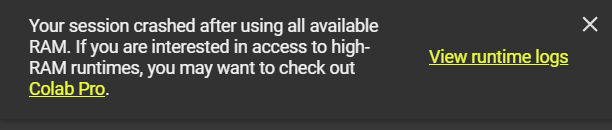

## **8 bit Quantization**

For memory optimization, you can load a model in 8-bit quantization. This can be achieved by using the `load_in_8bit=True` argument when calling .from_pretrained. This reduces the memory footprint by approximately half.

In [ ]:
model = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto", load_in_8bit=True)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
print(model.get_memory_footprint())

8098234368


## **4 bit Quantization**

For further memory optimization, we can load models in 4-bit quantization. This can be done by setting the `load_in_4bit=True` argument when calling the .from_pretrained method. By doing so, you can reduce memory usage by approximately fourfold.

In [ ]:
model = AutoModelForCausalLM.from_pretrained(model_id, load_in_4bit=True, device_map="auto")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
print(model.get_memory_footprint())

5078335488


In [ ]:
input_text = """Poor English: She no went to the market.
                Corrected English:"""
input_ids = tokenizer.encode(input_text, return_tensors="pt")
input_ids

tensor([[246653,   9522,  15114,    654,  21592,    427,    368,  16680,     17,
         178091,   9522]])

In [ ]:
output = model.generate(input_ids, max_length=18)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Poor English: She no went to the market. Corrected English: She didn't go to the market.



# **Instruct Fine-Tuning a Pre-Trained Model**

Instruct Fine-Tuning involves taking a pre-trained model, which has been trained on a large dataset for a general task and making minor adjustments to its internal parameters so it will work well for a specific task.

We will be fine-tuning the Falcon-7b model and turn it into a chatbot. With the PEFT library we can use the recent QLoRA approach to fine-tune adapters that are placed on top of the frozen 4-bit model for more memory efficient finetuning.

## **Loading the Dataset**

For training, we will use the Guanaco dataset, which is a clean subset of the OpenAssistant dataset adapted to train general purpose chatbots. It is an instruction dataset.

The link to this dataset: https://huggingface.co/datasets/timdettmers/openassistant-guanaco


In [45]:
from datasets import load_dataset

In [46]:
dataset_name = "timdettmers/openassistant-guanaco"

In [ ]:
dataset = load_dataset(dataset_name, split="train")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/timdettmers___json/timdettmers--openassistant-guanaco-c93588435bc90172/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


## **Loading the Model**

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, AutoTokenizer
import transformers
import torch

In [ ]:
model_name = "ybelkada/falcon-7b-sharded-bf16"

Let's load the tokenizer below.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4", # 4-bit normal float
    bnb_4bit_compute_dtype=torch.float16,
)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    trust_remote_code=True
)
model.config.use_cache = False

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b:
- configuration_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b:
- modelling_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('//172.28.0.1'), PosixPath('http')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc483011

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

Below we will load the configuration file in order to create the LoRA model.

### **How does LoRA help in efficient fine-tuning?**
To make fine-tuning more efficient, LoRA's approach is to represent the weight updates with two smaller matrices (called update matrices) through low-rank decomposition. These new matrices can be trained to adapt to the new data while keeping the overall number of changes low. The original weight matrix remains frozen and doesn't receive any further adjustments. To produce the final results, both the original and the adapted weights are combined.

<center>
<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/peft/lora_diagram.png" width=500>
</center>

According to QLoRA paper, it is important to consider all linear layers in the transformer block for maximum performance. Therefore we will add `dense`, `dense_h_to_4_h` and `dense_4h_to_h` layers in the target modules in addition to the mixed query key value layer.

In [47]:
from peft import LoraConfig

In [48]:
lora_alpha = 16 # LoRA scaling factor
lora_r = 64 # the rank of the update matrices
lora_dropout = 0.1

peft_config = LoraConfig(
    r=lora_r,
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    bias="none",
    task_type="CAUSAL_LM",

    # The attention blocks to apply the LoRA update matrices:
    target_modules=[
        "query_key_value" #,
        # "dense",
        # "dense_h_to_4h",
        # "dense_4h_to_h", # uncomment for max performance
    ]
)

## **Loading the Trainer**

Here we will use the [`SFTTrainer` from TRL library](https://huggingface.co/docs/trl/main/en/sft_trainer) that gives a wrapper around transformers `Trainer` to easily fine-tune models on instruction based datasets using PEFT adapters.

In [ ]:
from transformers import TrainingArguments

 Let's first load the training arguments below.

In [ ]:
output_dir = "./results"
per_device_train_batch_size = 4
gradient_accumulation_steps = 4
optim = "paged_adamw_32bit"
save_steps = 10
logging_steps = 10
learning_rate = 2e-4
max_grad_norm = 0.3
max_steps = 500
warmup_ratio = 0.03
lr_scheduler_type = "constant"

training_arguments = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    fp16=True,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=True,
    lr_scheduler_type=lr_scheduler_type,
    gradient_checkpointing=True,
    report_to=None
)

Then finally pass everthing to the trainer

In [ ]:
from trl import SFTTrainer

In [ ]:
trainer = SFTTrainer(
    model=model, # base model we use
    train_dataset=dataset, # training dataset
    peft_config=peft_config, # peft configuration
    dataset_text_field="text", # the right field inside the dataset
    max_seq_length=512, # sequence length
    tokenizer=tokenizer,
    args=training_arguments,
)

We will also pre-process the model by upcasting the layer norms in float 32 for more stable training

In [ ]:
for name, module in trainer.model.named_modules():
    if "norm" in name:
        module = module.to(torch.float32)

## **Train the model**

Now let's train the model! Simply call `trainer.train()`

In [ ]:
trainer.train()

During training, the model should converge nicely as follows:

![image](https://huggingface.co/datasets/trl-internal-testing/example-images/resolve/main/images/loss-falcon-7b.png)

The `SFTTrainer` also takes care of properly saving only the adapters during training instead of saving the entire model.


---



<center>

**Connect with me!**

[<img src="https://cdn1.iconfinder.com/data/icons/logotypes/32/circle-linkedin-512.png" width=60>](https://www.linkedin.com/in/amrithanandini/)
[<img src="https://cdn-icons-png.flaticon.com/512/25/25231.png" width=60>](https://github.com/amri-tah/)
[<img src="https://seeklogo.com/images/B/behance-logo-1373E40919-seeklogo.com.png" width=60>](https://www.behance.net/amrithanandini)
[<img src="https://www.freeiconspng.com/thumbs/email-icon/email-icon--clipart-best-22.png" width=60>](mailto:amrithanandini2003@gmail.com)

</center>